In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pip install matplotlib

In [4]:
data = pd.read_csv("scholarship.csv")
data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [5]:
df=data.copy()

In [6]:
df.shape

(1000, 3)

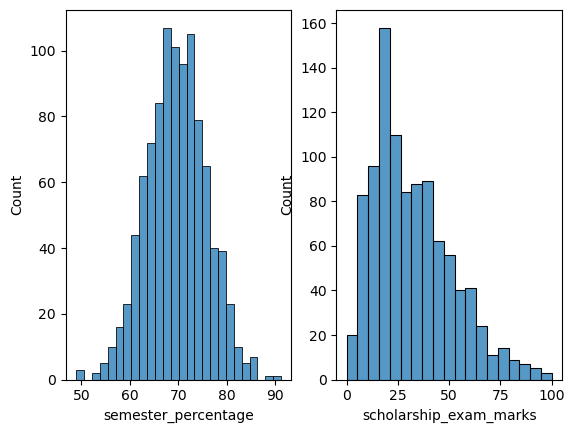

In [15]:
plt.subplot(1,2,1)
sns.histplot(df["semester_percentage"])
#normal distribution

plt.subplot(1,2,2)
sns.histplot(df["scholarship_exam_marks"])
#skew distribution

plt.show()

In [20]:
mean = df["semester_percentage"].mean()
SD = df["semester_percentage"].std()
print(mean," " ,SD)

69.6124   6.158978751323897


In [22]:
highAllowed = mean + 3*SD
lowestAllowed = mean - 3*SD
print(highAllowed," ", lowestAllowed)

88.08933625397168   51.13546374602831


In [26]:
df[(df["semester_percentage"]<lowestAllowed) | (df["semester_percentage"]> highAllowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


# TRIMMING

In [31]:
df[(df["semester_percentage"]>lowestAllowed) & (df["semester_percentage"]<highAllowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


# Z-Score

In [34]:
df["z-score"] = (df["semester_percentage"] - df["semester_percentage"].mean())/df["semester_percentage"].std()
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239


In [36]:
df[(df["z-score"]<-3) | (df["z-score"]>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [38]:
 df[(df["z-score"]>-3) & (df["z-score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


# CAPPING

In [40]:
high = mean-3*SD
low = mean + 3*SD
print(high, " ", low)

51.13546374602831   88.08933625397168


In [45]:
df["semester_percentage"] = np.where(df["semester_percentage"]>high, high, np.where(df["semester_percentage"]<low, low, df["semester_percentage"]))

In [48]:
df[(df["semester_percentage"]>low) & (df["semester_percentage"]<high)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
